In [110]:
#Jaime Solis js96986

# Association Analysis

Association analysis uses machine learning algorithms to extract hidden relationships from large datasets. In this assignment we'll be using one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

The data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

Most of you should use Conda to do the install. If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter. 

Open a command prompt / terminal window and type:

`pip3 install mlxtend`


## Apriori Algorithm

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be running this algorithm for generating the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets you'll find association rules that have confidence above the `min_conf` threshold.

In [124]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [125]:
%matplotlib inline

In [126]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [127]:
dataset = load_dataset('BreadBasket_DMS.csv')
#dataset is a 2D list
print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

**Q1.** Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset.

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

Top 10 items: 
Coffee           5464
Bread            3320
Tea              1435
Cake             1024
Pastry            855
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: items, dtype: int64


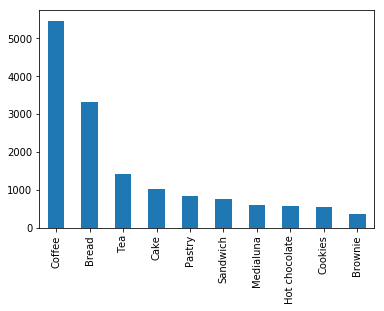

In [129]:
items=[]
for transaction in dataset:
    for item in transaction:
        if item=='NONE':
            transaction.remove(item)
        items.append(item)

topItems = pd.DataFrame(items, columns=['items'])
print('Top 10 items: ')
print(topItems['items'].value_counts().head(10))
topItems['items'].value_counts().head(10).plot.bar()

**Q2.** 

a.) Using `mlxtend.preprocessing.TransactionEncoder` transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table. 

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [130]:
#a)
transEncoder = TransactionEncoder()
transEncoderArray = transEncoder.fit(dataset).transform(dataset)
print(transEncoderArray.shape)
#b)
transEncoder.inverse_transform(transEncoderArray[:5])

(9531, 94)


[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

**Q3.** Convert the encoded numpy array from Q2 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [131]:
dfTransactions = pd.DataFrame(transEncoderArray, columns=transEncoder.columns_)
dfTransactions.head()


Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0       False                     False      False            False     False   
1       False                     False      False            False     False   
2       False                     False      False            False     False   
3       False                     False      False            False     False   
4       False                     False      False            False     False   

   Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  The BART  The Nomad  \
0  False     False     False         False   False  ...     False      False   
1  False     False     False         False   False  ...     False      False   
2  False     False     False         False   False  ...     False      False   
3  False     False     False         False   False  ...     False      False   
4  False     False     False         False   False  ...     False      False   

   Tiffin  Toast  Truffles  Tshirt  Valentine's card  Vegan Feast  \
0   False  False     False   False             False        False   
1   False  False     False   False             False        False   
2   False  False     False   False             False        False   
3   False  False     False   False             False        False   
4   False  False     False   False             False        False   

   Vegan mincepie  Victorian Sponge  
0           False             False  
1           False             False  
2           False             False  
3           False             False  
4           False             False  

[5 rows x 94 columns]

**Q4.** Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1%. Display these itemsets along with their support values.

In [132]:
freqItemsets = apriori(dfTransactions, min_support=0.01, use_colnames=True)
freqItemsets

support                  itemsets
0   0.036093               (Alfajores)
1   0.015948                (Baguette)
2   0.324940                   (Bread)
3   0.039765                 (Brownie)
4   0.103137                    (Cake)
5   0.012905            (Chicken Stew)
6   0.475081                  (Coffee)
7   0.019305                    (Coke)
8   0.054034                 (Cookies)
9   0.038926              (Farm House)
10  0.014899                   (Fudge)
11  0.010492       (Hearty & Seasonal)
12  0.057916           (Hot chocolate)
13  0.014899                     (Jam)
14  0.013115          (Jammie Dodgers)
15  0.038296                   (Juice)
16  0.061379               (Medialuna)
17  0.014059           (Mineral water)
18  0.038191                  (Muffin)
19  0.085510                  (Pastry)
20  0.010387                   (Salad)
21  0.071346                (Sandwich)
22  0.028853            (Scandinavian)
23  0.034309                   (Scone)
24  0.034204                    (Soup)
25  0.018046          (Spanish Brunch)
26  0.141643                     (Tea)
27  0.015318                  (Tiffin)
28  0.033365                   (Toast)
29  0.020145                (Truffles)
30  0.010282        (Bread, Alfajores)
31  0.019515       (Coffee, Alfajores)
32  0.010702          (Brownie, Bread)
33  0.023187             (Cake, Bread)
34  0.089393           (Coffee, Bread)
35  0.014374          (Cookies, Bread)
36  0.013325    (Hot chocolate, Bread)
37  0.016787        (Medialuna, Bread)
38  0.028958           (Pastry, Bread)
39  0.016892         (Bread, Sandwich)
40  0.027909              (Tea, Bread)
41  0.019515         (Coffee, Brownie)
42  0.054349            (Coffee, Cake)
43  0.011331     (Hot chocolate, Cake)
44  0.023607               (Tea, Cake)
45  0.028014         (Cookies, Coffee)
46  0.029378   (Coffee, Hot chocolate)
47  0.020460           (Coffee, Juice)
48  0.034939       (Medialuna, Coffee)
49  0.018676          (Muffin, Coffee)
50  0.047214          (Pastry, Coffee)
51  0.037981        (Coffee, Sandwich)
52  0.017941           (Coffee, Scone)
53  0.015738            (Coffee, Soup)
54  0.010807  (Spanish Brunch, Coffee)
55  0.049523             (Tea, Coffee)
56  0.023502           (Coffee, Toast)
57  0.014269           (Tea, Sandwich)
58  0.011122   (Pastry, Coffee, Bread)

**Q5.** Using the frequent itemsets and support counts in Q4, find and display all the maximal frequent itemsets along with their support fraction. Also print a count of how many maximal frequent itemsets you have found.

In [133]:
maximalFreqItemsets = freqItemsets.copy()

for index, row in freqItemsets.iterrows():
    itemset = row['itemsets']
    itemsetsToCompare = freqItemsets.drop(index)
    for i, r in itemsetsToCompare.iterrows():
        if itemset.issubset(r['itemsets']):
            maximalFreqItemsets.drop(index, inplace=True)
            break;
            
print(maximalFreqItemsets)
print('Maximal frequent Itemsets: ', len(maximalFreqItemsets))

     support                  itemsets
1   0.015948                (Baguette)
5   0.012905            (Chicken Stew)
7   0.019305                    (Coke)
9   0.038926              (Farm House)
10  0.014899                   (Fudge)
11  0.010492       (Hearty & Seasonal)
13  0.014899                     (Jam)
14  0.013115          (Jammie Dodgers)
17  0.014059           (Mineral water)
20  0.010387                   (Salad)
22  0.028853            (Scandinavian)
27  0.015318                  (Tiffin)
29  0.020145                (Truffles)
30  0.010282        (Bread, Alfajores)
31  0.019515       (Coffee, Alfajores)
32  0.010702          (Brownie, Bread)
33  0.023187             (Cake, Bread)
35  0.014374          (Cookies, Bread)
36  0.013325    (Hot chocolate, Bread)
37  0.016787        (Medialuna, Bread)
39  0.016892         (Bread, Sandwich)
40  0.027909              (Tea, Bread)
41  0.019515         (Coffee, Brownie)
42  0.054349            (Coffee, Cake)
43  0.011331     (Hot cho

**Q6.** Using the frequent itemsets and support counts in Q4, find all the closed frequent itemsets along with their support fraction. Also print a count of how many closed frequent itemsets you have found.

In [134]:
closedFreqItemsets = freqItemsets.copy()

for index, row in freqItemsets.iterrows():
    itemset = row['itemsets']
    itemsetsToCompare = freqItemsets.drop(index)
    for i, r in itemsetsToCompare.iterrows():
        if itemset.issuperset(r['itemsets']):
            if row['support'] == r['support']:
                closedFreqItemsets.drop(i, inplace=True)
                break;
            
print(closedFreqItemsets)
print('Closed Frequent Itemsets: ',len(closedFreqItemsets))

     support                  itemsets
0   0.036093               (Alfajores)
1   0.015948                (Baguette)
2   0.324940                   (Bread)
3   0.039765                 (Brownie)
4   0.103137                    (Cake)
5   0.012905            (Chicken Stew)
6   0.475081                  (Coffee)
7   0.019305                    (Coke)
8   0.054034                 (Cookies)
9   0.038926              (Farm House)
10  0.014899                   (Fudge)
11  0.010492       (Hearty & Seasonal)
12  0.057916           (Hot chocolate)
13  0.014899                     (Jam)
14  0.013115          (Jammie Dodgers)
15  0.038296                   (Juice)
16  0.061379               (Medialuna)
17  0.014059           (Mineral water)
18  0.038191                  (Muffin)
19  0.085510                  (Pastry)
20  0.010387                   (Salad)
21  0.071346                (Sandwich)
22  0.028853            (Scandinavian)
23  0.034309                   (Scone)
24  0.034204             

**Q7.** Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q4.

In [135]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freqItemsets, metric="confidence", min_threshold=0.25)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents consequents   support  confidence      lift
0        (Alfajores)     (Bread)  0.010282    0.284884  0.876728
1        (Alfajores)    (Coffee)  0.019515    0.540698  1.138116
2          (Brownie)     (Bread)  0.010702    0.269129  0.828244
3            (Bread)    (Coffee)  0.089393    0.275105  0.579069
4          (Cookies)     (Bread)  0.014374    0.266019  0.818673
5        (Medialuna)     (Bread)  0.016787    0.273504  0.841708
6           (Pastry)     (Bread)  0.028958    0.338650  1.042194
7          (Brownie)    (Coffee)  0.019515    0.490765  1.033013
8             (Cake)    (Coffee)  0.054349    0.526958  1.109196
9          (Cookies)    (Coffee)  0.028014    0.518447  1.091280
10   (Hot chocolate)    (Coffee)  0.029378    0.507246  1.067704
11           (Juice)    (Coffee)  0.020460    0.534247  1.124537
12       (Medialuna)    (Coffee)  0.034939    0.569231  1.198175
13          (Muffin)    (Coffee)  0.018676    0.489011  1.029321
14          (Pastry)    (Coffee)  0.047214    0.552147  1.162216
15        (Sandwich)    (Coffee)  0.037981    0.532353  1.120551
16           (Scone)    (Coffee)  0.017941    0.522936  1.100729
17            (Soup)    (Coffee)  0.015738    0.460123  0.968514
18  (Spanish Brunch)    (Coffee)  0.010807    0.598837  1.260494
19             (Tea)    (Coffee)  0.049523    0.349630  0.735936
20           (Toast)    (Coffee)  0.023502    0.704403  1.482699
21   (Pastry, Bread)    (Coffee)  0.011122    0.384058  0.808405

**Q8.** An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying its value between 0 and 1 with increments of 0.1. What happens when we increase the confidence level? Why?

    Confidence  Number of rules
0          0.0              194
1          0.1              103
2          0.2               57
3          0.3               35
4          0.4               24
5          0.5               17
6          0.6                4
7          0.7                2
8          0.8                1
9          0.9                0
10         1.0                0


'We can see that the higher the confidence threshold is, the less number of rules are generated, because to be \n    considerated a rule, it needs to be equal or higher that the threshold. So, as we increment the confidence\n    threshold, it becomes more difficult that rules can meet the threshold'

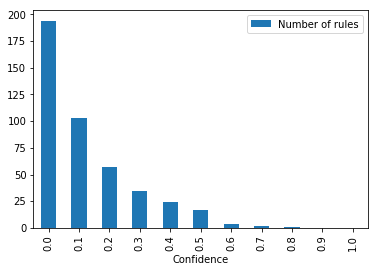

In [136]:
freqItemsets2 = apriori(dfTransactions, min_support=0.005, use_colnames=True)

numRules = []
confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]


for threshold in confidence:
    quantity = association_rules(freqItemsets2, metric="confidence", min_threshold=threshold)
    numRules.append(len(quantity))


df = pd.DataFrame({'Confidence': confidence, 'Number of rules': numRules})
print(df)
plot = df.plot.bar(x='Confidence', y='Number of rules')

'''We can see that the higher the confidence threshold is, the less number of rules are generated, because to be 
    considerated a rule, it needs to be equal or higher that the threshold. So, as we increment the confidence
    threshold, it becomes more difficult that rules can meet the threshold'''

**Q9.** What value would you choose for the minimum confidence threshold based on the plot in Q8? Why? Display the rules generated for your chosen value. Take a look at the generated rules. Are they interesting? Why/why not?

In [137]:
rules2 = association_rules(freqItemsets2, metric="confidence", min_threshold=0.5)
rules2[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

'''I think a good confidence threshold to choose is when lift values are more than 1. In this case, 
    it is with a confidence of .5. When the lift is less than one it means that it is a bad rule 
    because it is less likely for the the consequent(s) to be bought if the antecedent(s) is bought than 
    if the antecedent(s) is not bought at all. There were also rules with lift above one but with really 
    low confidence. All the rules have coffee as consequent this could mean that the bakery sells a lot of 
    coffee.'''

'I think a good confidence threshold to choose is when lift values are more than 1. In this case, \n    it is with a confidence of .5. When the lift is less than one it means that it is a bad rule \n    because it is less likely for the the consequent(s) to be bought if the antecedent(s) is bought than \n    if the antecedent(s) is not bought at all. There were also rules with lift above one but with really \n    low confidence. All the rules have coffee as consequent this could mean that the bakery sells a lot of \n    coffee.'